In [65]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten,AveragePooling2D
from keras import Sequential 
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [66]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [67]:
# LeNet Architecture
model=Sequential()

model.add(Conv2D(6,kernel_size=(5,5),padding='valid',activation='tanh',input_shape=(28,28,1))) # originally in LeNet, the input_shape was (32,32,1) 1 for channel 
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(6,kernel_size=(5,5),padding='valid',activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(120,activation='tanh'))
model.add(Dense(84,activation='tanh'))
model.add(Dense(10,activation='softmax'))

In [68]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_18            │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 8, 8, 6)        │           906 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_19            │ (None, 4, 4, 6)        │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 120)            │        11,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,716 (92.64 KB)

 Trainable params: 23,716 (92.64 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [70]:
history=model.fit(X_train,y_train,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8748 - loss: 0.4284 - val_accuracy: 0.9679 - val_loss: 0.1034
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9708 - loss: 0.0942 - val_accuracy: 0.9778 - val_loss: 0.0766
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9793 - loss: 0.0653 - val_accuracy: 0.9817 - val_loss: 0.0634
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9841 - loss: 0.0511 - val_accuracy: 0.9786 - val_loss: 0.0712
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9858 - loss: 0.0450 - val_accuracy: 0.9829 - val_loss: 0.0588
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9866 - loss: 0.0411 - val_accuracy: 0.9834 - val_loss: 0.0537
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9879 - loss: 0.0373 - val_accuracy: 0.9840 - val_loss: 0.0560
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9904 - loss: 0.0302 - 

In [71]:
# Training loss and accuracy
training_loss, training_accuracy = model.evaluate(X_train, y_train, verbose=1)
print(f'Training accuracy: {training_accuracy*100:.2f}%')
print(f'Training loss: {training_loss:.4f}')

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9937 - loss: 0.0208
Training accuracy: 99.20%
Training loss: 0.0267


In [72]:
# Test set accuracy and loss
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test accuracy: {test_accuracy*100:.2f}%')
print(f'Test loss: {test_loss:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9830 - loss: 0.0549
Test accuracy: 98.53%
Test loss: 0.0469


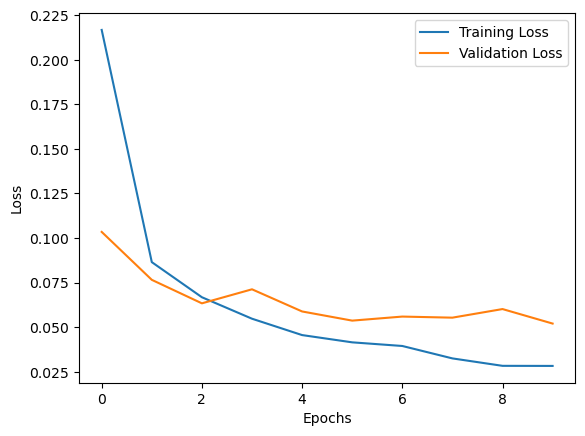

In [73]:
# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

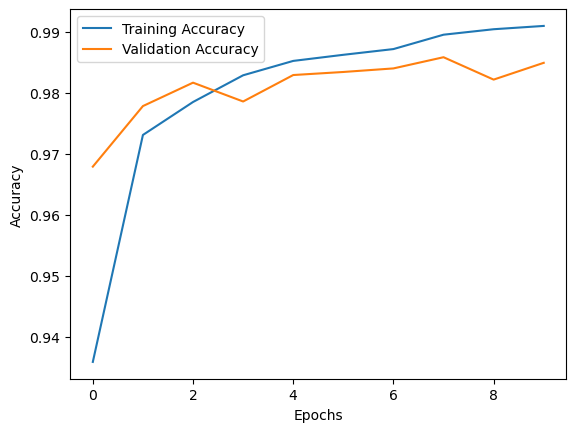

In [74]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
